# Explore features, pick best features to use for classification

REPEATing exploration on 15 second clips to see if any differences 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import pickle as pkl

dataset_path_15sec_clips = './DataStreamFeatures/TrainData_15sec_480.pkl'

with open(dataset_path_15sec_clips, "rb") as f:
    train_X, train_Y = pkl.load(f)
    
m , n = train_X.shape   # number of samples, total availabl number of features

print(f'{train_X.shape=} {train_Y.shape=}')

print(f'{m=} training examples with {n=} features each')

train_X.shape=(480, 36) train_Y.shape=(480,)
m=480 training examples with n=36 features each


In [4]:
# note see Feature Extraction Pipeline, where this encoding order is set... 
Composers = ['Bach','Beethoven','Brahms','Schubert']

label_encodings = dict()

for index,composer in enumerate(Composers):
    
    label_encodings[index]=composer

print(label_encodings)

{0: 'Bach', 1: 'Beethoven', 2: 'Brahms', 3: 'Schubert'}


# Convert to Pandas DataFrame for easy data exploration

In [7]:
#columns names for 30 second clip data set 
#names_path = './DataStreamFeatures/TrainColumnNames_36.pkl'

names_path = './DataStreamFeatures/TrainColumnNames_36.pkl'

with open(names_path, "rb") as f:
    column_names = pkl.load(f)


In [8]:
df = pd.DataFrame(train_X, columns = column_names)

df['Composer_label']=train_Y

series = pd.Series(train_Y)

df['Composer_name']= series.map(label_encodings)

df.head(10)

,AverageMelodicInterval,MostCommonMelodicInterval,DistanceBetweenMostCommonMelodicIntervals,MostCommonMelodicIntervalPrevalence,RelativeStrengthOfMostCommonIntervals,NumberOfCommonMelodicIntervals,AmountOfArpeggiation,RepeatedNotes,MelodicThirds,MelodicFifths,...,AverageNoteDuration,VariabilityOfNoteDuration,MaximumNoteDuration,MinimumNoteDuration,StaccatoIncidence,AverageTimeBetweenAttacks,VariabilityOfTimeBetweenAttacks,Duration,Composer_label,Composer_name
0,2.142857,0.0,2.0,0.348214,0.641026,3.0,0.562500,0.348214,0.116071,0.053571,...,0.188596,0.089537,0.500,0.125,0.0,0.166223,0.066715,15.75,0.0,Bach
1,4.426829,2.0,1.0,0.317073,0.538462,3.0,0.304878,0.024390,0.121951,0.048780,...,0.189759,0.070927,0.500,0.125,0.0,0.189024,0.071044,15.75,0.0,Bach
2,3.567308,2.0,1.0,0.278846,0.620690,5.0,0.432692,0.096154,0.250000,0.048077,...,0.181604,0.091070,0.500,0.125,0.0,0.164894,0.073416,15.75,0.0,Bach
3,1.640351,0.0,2.0,0.412281,0.702128,3.0,0.508772,0.412281,0.026316,0.026316,...,0.174569,0.083497,0.500,0.125,0.0,0.156566,0.069594,15.75,0.0,Bach
4,2.431193,0.0,2.0,0.284404,0.741935,4.0,0.513761,0.284404,0.146789,0.045872,...,0.193694,0.089949,0.500,0.125,0.0,0.170330,0.068130,15.75,0.0,Bach
5,3.810000,2.0,1.0,0.290000,0.620690,4.0,0.400000,0.050000,0.260000,0.050000,...,0.174020,0.086029,0.500,0.125,0.0,0.164474,0.073142,15.75,0.0,Bach
6,3.388889,2.0,1.0,0.240741,0.730769,5.0,0.453704,0.166667,0.212963,0.037037,...,0.195455,0.090024,0.500,0.125,0.0,0.173611,0.068957,15.75,0.0,Bach
7,4.010101,2.0,1.0,0.313131,0.580645,4.0,0.373737,0.020202,0.252525,0.050505,...,0.168317,0.085154,0.500,0.125,0.0,0.161082,0.071703,15.75,0.0,Bach
8,2.850202,2.0,1.0,0.323887,0.937500,3.0,0.275304,0.036437,0.165992,0.024291,...,0.175062,0.092930,0.875,0.125,0.0,0.128024,0.023767,16.00,0.0,Bach
9,2.887967,2.0,1.0,0.340249,0.829268,3.0,0.253112,0.041494,0.145228,0.020747,...,0.178117,0.095148,0.875,0.125,0.0,0.128024,0.023767,16.00,0.0,Bach


In [9]:
df.describe()

,AverageMelodicInterval,MostCommonMelodicInterval,DistanceBetweenMostCommonMelodicIntervals,MostCommonMelodicIntervalPrevalence,RelativeStrengthOfMostCommonIntervals,NumberOfCommonMelodicIntervals,AmountOfArpeggiation,RepeatedNotes,MelodicThirds,MelodicFifths,...,NoteDensity,AverageNoteDuration,VariabilityOfNoteDuration,MaximumNoteDuration,MinimumNoteDuration,StaccatoIncidence,AverageTimeBetweenAttacks,VariabilityOfTimeBetweenAttacks,Duration,Composer_label
count,480.000000,480.000000,480.0000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0000
mean,4.040242,2.220833,2.2125,0.302357,0.709955,3.754167,0.435995,0.129971,0.171700,0.055811,...,8.177090,0.330053,0.227328,1.399580,0.144741,0.020400,0.261349,0.119671,17.881186,1.5000
std,1.601837,2.523622,2.5202,0.113089,0.198866,1.078342,0.150376,0.145508,0.102921,0.064379,...,4.625889,0.159987,0.153046,1.102231,0.079579,0.091619,0.130983,0.114768,7.061508,1.1192
min,0.000000,0.000000,0.0000,0.136364,0.000000,1.000000,0.039216,0.000000,0.000000,0.000000,...,1.994291,0.125795,0.000000,0.150000,0.000000,0.000000,0.093750,0.000000,14.109602,0.0000
25%,2.891347,1.000000,1.0000,0.223955,0.592172,3.000000,0.329897,0.028571,0.100630,0.017168,...,5.044118,0.217055,0.124450,0.750000,0.125000,0.000000,0.169171,0.047313,15.749685,0.7500
50%,3.795522,2.000000,1.0000,0.280000,0.731456,4.000000,0.422049,0.076923,0.158007,0.040687,...,7.375000,0.292436,0.197910,1.125000,0.125000,0.000000,0.242537,0.092485,16.000000,1.5000
75%,4.905154,2.000000,2.0000,0.361526,0.867949,5.000000,0.532068,0.180833,0.235498,0.070175,...,9.968453,0.390309,0.284670,1.500000,0.125000,0.000000,0.298943,0.160345,16.500000,2.2500
max,11.357143,12.000000,12.0000,1.000000,1.000000,7.000000,1.000000,1.000000,0.587766,0.656716,...,27.250000,1.114918,1.104315,9.000000,0.500000,0.915789,0.978261,1.165428,54.000000,3.0000


In [10]:
desc = df.describe()

desc.loc[['max','min']]

,AverageMelodicInterval,MostCommonMelodicInterval,DistanceBetweenMostCommonMelodicIntervals,MostCommonMelodicIntervalPrevalence,RelativeStrengthOfMostCommonIntervals,NumberOfCommonMelodicIntervals,AmountOfArpeggiation,RepeatedNotes,MelodicThirds,MelodicFifths,...,NoteDensity,AverageNoteDuration,VariabilityOfNoteDuration,MaximumNoteDuration,MinimumNoteDuration,StaccatoIncidence,AverageTimeBetweenAttacks,VariabilityOfTimeBetweenAttacks,Duration,Composer_label
max,11.357143,12.0,12.0,1.000000,1.0,7.0,1.000000,1.0,0.587766,0.656716,...,27.250000,1.114918,1.104315,9.00,0.5,0.915789,0.978261,1.165428,54.000000,3.0
min,0.000000,0.0,0.0,0.136364,0.0,1.0,0.039216,0.0,0.000000,0.000000,...,1.994291,0.125795,0.000000,0.15,0.0,0.000000,0.093750,0.000000,14.109602,0.0


In [11]:
desc.loc[['mean','std']]

,AverageMelodicInterval,MostCommonMelodicInterval,DistanceBetweenMostCommonMelodicIntervals,MostCommonMelodicIntervalPrevalence,RelativeStrengthOfMostCommonIntervals,NumberOfCommonMelodicIntervals,AmountOfArpeggiation,RepeatedNotes,MelodicThirds,MelodicFifths,...,NoteDensity,AverageNoteDuration,VariabilityOfNoteDuration,MaximumNoteDuration,MinimumNoteDuration,StaccatoIncidence,AverageTimeBetweenAttacks,VariabilityOfTimeBetweenAttacks,Duration,Composer_label
mean,4.040242,2.220833,2.2125,0.302357,0.709955,3.754167,0.435995,0.129971,0.171700,0.055811,...,8.177090,0.330053,0.227328,1.399580,0.144741,0.020400,0.261349,0.119671,17.881186,1.5000
std,1.601837,2.523622,2.5202,0.113089,0.198866,1.078342,0.150376,0.145508,0.102921,0.064379,...,4.625889,0.159987,0.153046,1.102231,0.079579,0.091619,0.130983,0.114768,7.061508,1.1192


## One Hot Encode the labels, so can see correlations between features and labels 

In [12]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['Composer_name'])
# Drop column B as it is now encoded
#df = df.drop('Composer_name',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [13]:
df[Composers].head()

,Bach,Beethoven,Brahms,Schubert
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


# Search for features that correlate strongly with Composer

- check the correlation of composer one-hot encoding with all features

- broke them up into groups of 10, to plot

- rows of each heat map give absolute values of the correlation with Bach, Beethoven, Brahms, Schubert

In [14]:
sub_number = 10 # limit number columns each correlation plot

column_subsets = []

for index in range(0,n,sub_number):
    
    column_subsets.append(column_names[index:index+sub_number])

<AxesSubplot: >

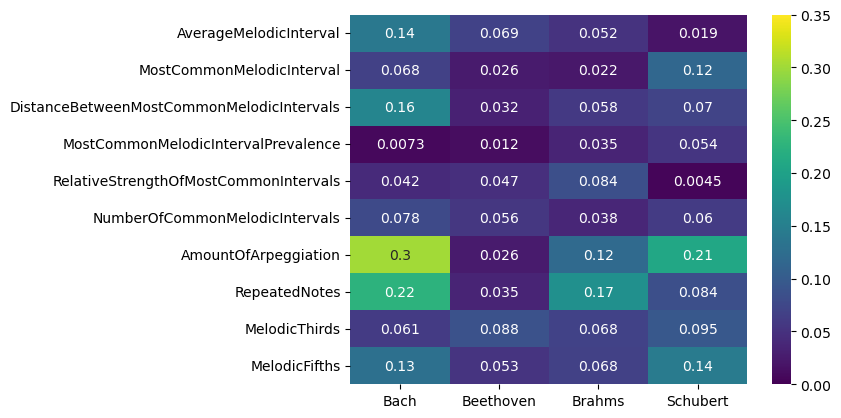

In [15]:
count = 0

subset_cols = column_subsets[count]

subset_df = df[subset_cols+Composers]  # keep composer one-hot labels each set

sns.heatmap(data=subset_df.corr(method='pearson')[Composers].loc[subset_cols].abs(),cmap='viridis',vmin=0,vmax=+0.35,annot=True)

<AxesSubplot: >

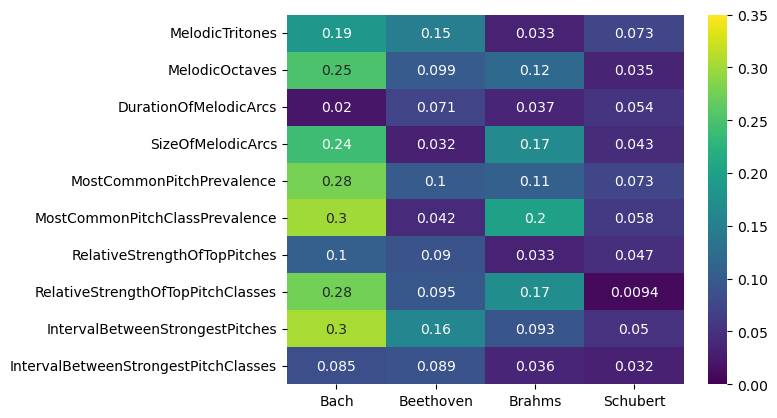

In [16]:
count = 1

subset_cols = column_subsets[count]

subset_df = df[subset_cols+Composers]  # keep composer one-hot labels each set

sns.heatmap(data=subset_df.corr(method='pearson')[Composers].loc[subset_cols].abs(),cmap='viridis',vmin=0,vmax=+0.35,annot=True)

<AxesSubplot: >

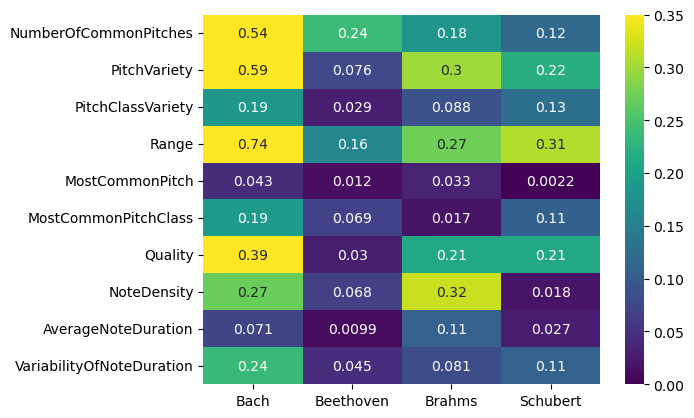

In [18]:
count = 2

subset_cols = column_subsets[count]

subset_df = df[subset_cols+Composers]  # keep composer one-hot labels each set

sns.heatmap(data=subset_df.corr(method='pearson')[Composers].loc[subset_cols].abs(),cmap='viridis',vmin=0,vmax=+0.35,annot=True)

<AxesSubplot: >

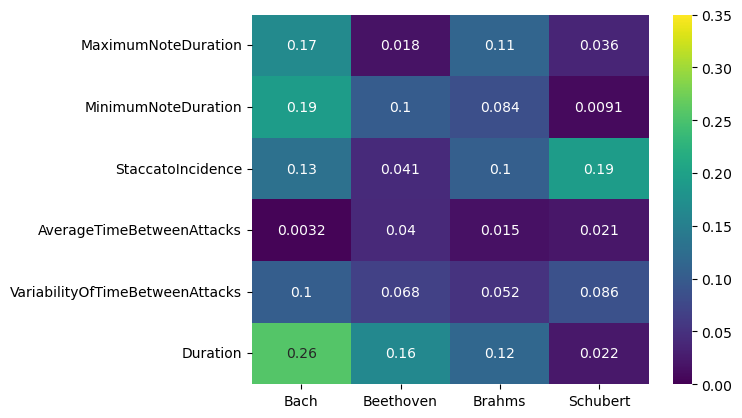

In [19]:
count = 3

subset_cols = column_subsets[count]

subset_df = df[subset_cols+Composers]  # keep composer one-hot labels each set

sns.heatmap(data=subset_df.corr(method='pearson')[Composers].loc[subset_cols].abs(),cmap='viridis',vmin=0,vmax=+0.35,annot=True)

## Findings 

- from the plots, can see that there are quite a few features that correlate strongly 

- Interesting that correlations with Bach are strongest... I guess Bach is Earlier composer, most ditinctive of these 4? 

- from initial inspection, following short list of features might be useful to start with 

    * Range
    * PitchVariety
    * NumberOfCommonPitches
    * IntervalBetweenStrongestPitches
    * AmountOfArpeggeation
    * SizeOfMelodicArcs
    * MostCommonPitchPrevalence
    * Quality
    * Note Density
    * ImportanceOfMiddleRegister
    * VariabilityOfNoteDuration
    

### Try to rank the features by strongest to least average correlation with Composer

In [20]:
# compute average across all rows , should be avg correlation strength 

# filter to keep list of strongest correlations, take cutoff of 0.1

strengths = df.corr(method='pearson',numeric_only=True)[Composers].loc[column_names].abs().mean(axis=1)

strengths.sort_values(inplace=True,ascending=False)

strengths[strengths>0.1]

Range                                0.371365
PitchVariety                         0.296356
NumberOfCommonPitches                0.268820
Quality                              0.209822
NoteDensity                          0.169233
AmountOfArpeggiation                 0.163811
IntervalBetweenStrongestPitches      0.152007
MostCommonPitchClassPrevalence       0.149842
Duration                             0.139354
MostCommonPitchPrevalence            0.139028
RelativeStrengthOfTopPitchClasses    0.137828
RepeatedNotes                        0.129596
MelodicOctaves                       0.125563
SizeOfMelodicArcs                    0.120872
VariabilityOfNoteDuration            0.117620
StaccatoIncidence                    0.116374
MelodicTritones                      0.110038
PitchClassVariety                    0.107445
dtype: float64

In [21]:
#keep list of best features

best_features_names = list(strengths[strengths>0.1].index)

print(len(best_features_names))

18


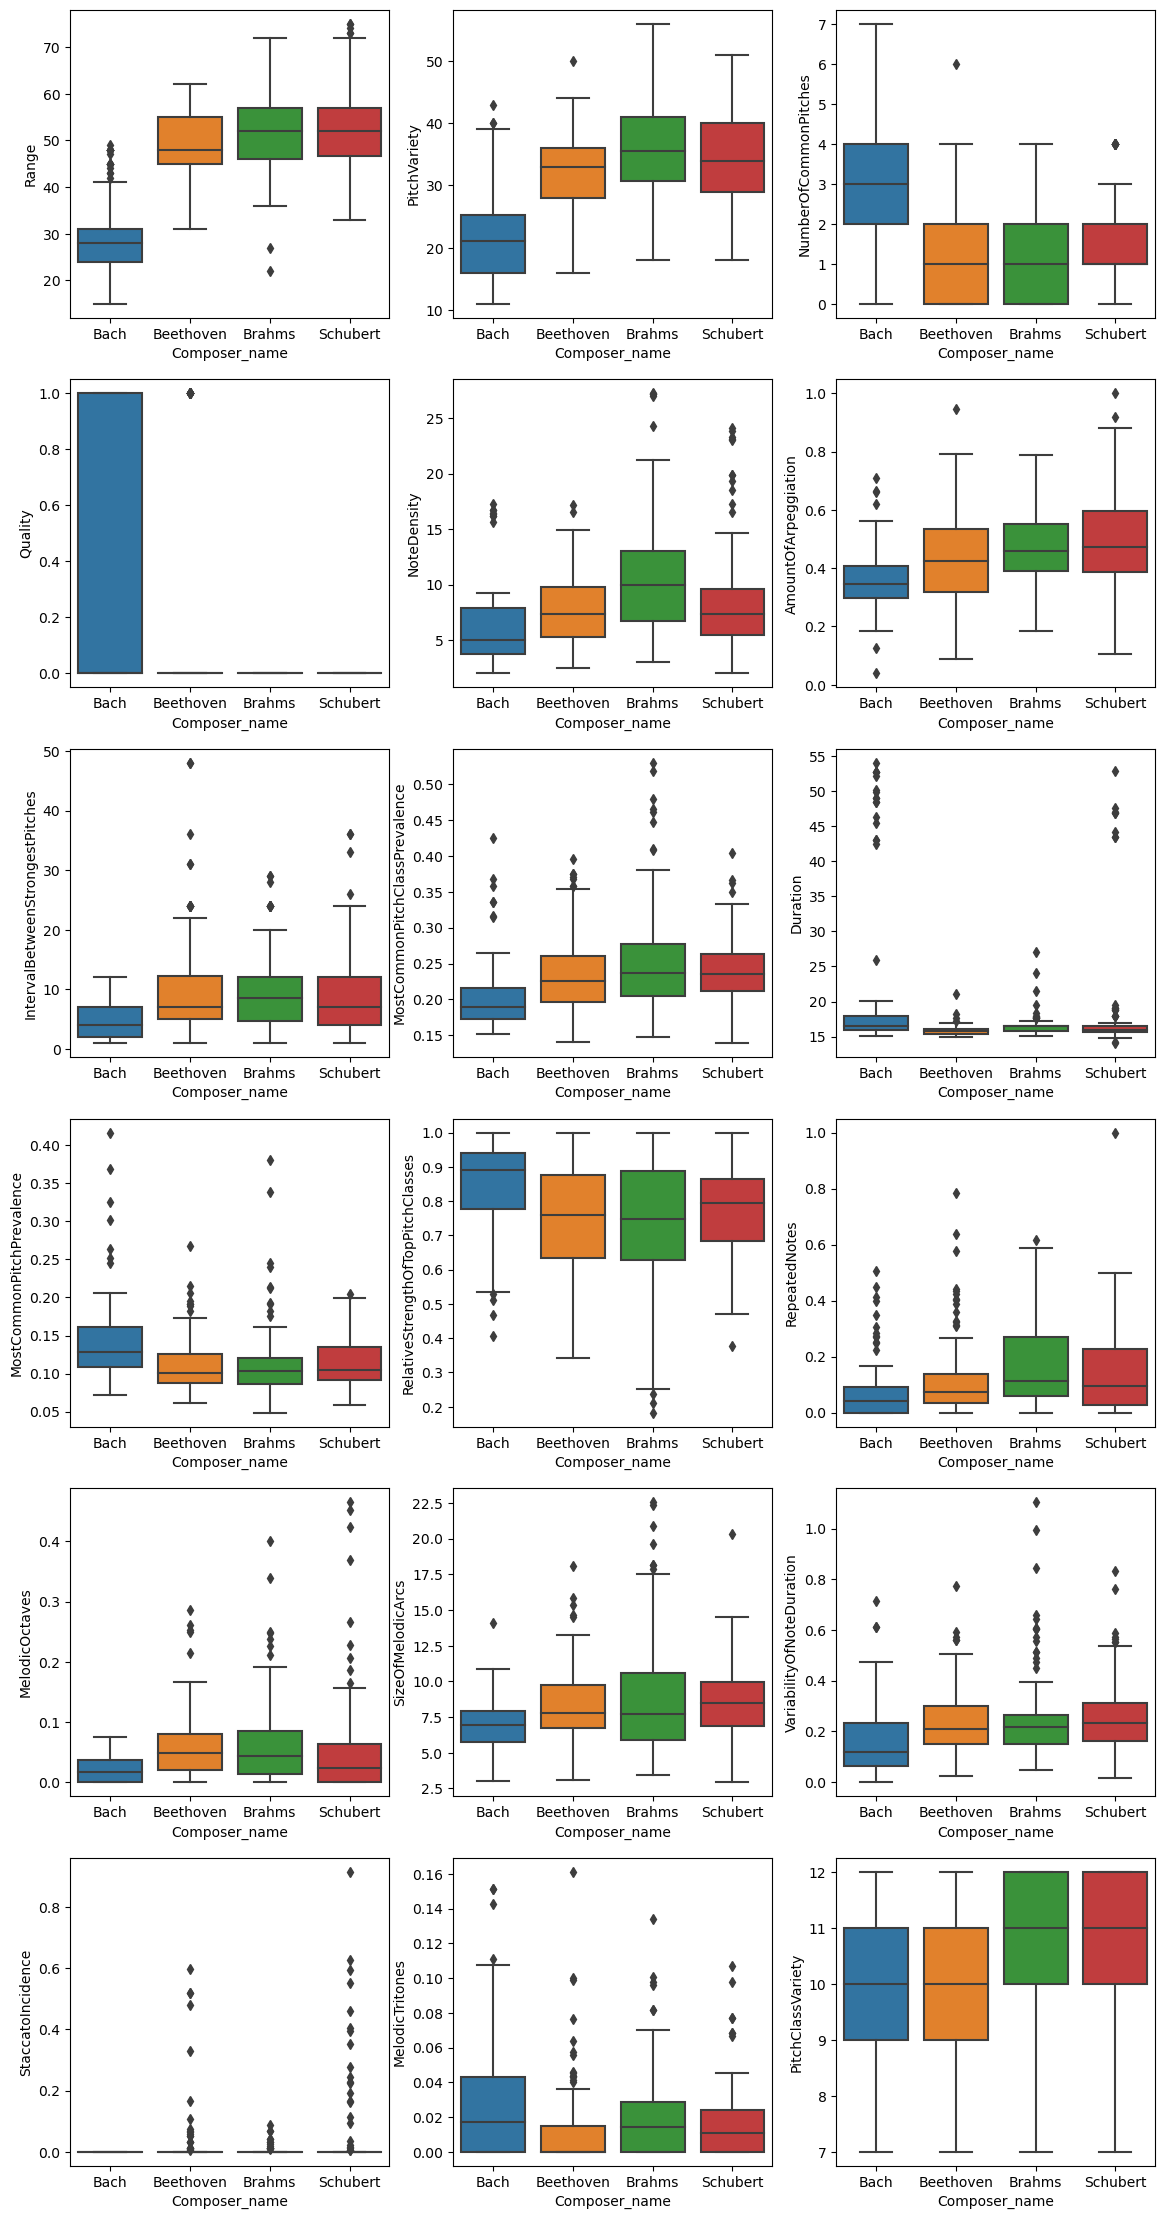

In [23]:
category = 'Composer_name'

rows = 6
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(14, 28))


count = 0
for i in range(rows):
    for j in range(cols):
        
        if count<len(best_features_names):
            sns.boxplot(x=df[category], y=df[best_features_names[count]], ax=axs[i, j])
        count+=1
        
        

# Findings

- stands out that Bach features fall in different ranges than other 3, variations between distributions more subtle

- Quality = 0 or 1, Major, or Minor.. Not sure if this is fluc of the data set , that Bach only one to have 1?

- StaccatoIncidence just seems to be zero for all of them

- Duration related to how the streams were clipped, so shouldn't be a relevant feature 

- going to drop Quality, StaccatoIncidence, and Duration 


In [24]:
features_to_drop = ['Quality','StaccatoIncidence','Duration']

for i in range(len(features_to_drop)):
    best_features_names.pop(best_features_names.index(features_to_drop[i]))

In [25]:
best_features_names

['Range',
 'PitchVariety',
 'NumberOfCommonPitches',
 'NoteDensity',
 'AmountOfArpeggiation',
 'IntervalBetweenStrongestPitches',
 'MostCommonPitchClassPrevalence',
 'MostCommonPitchPrevalence',
 'RelativeStrengthOfTopPitchClasses',
 'RepeatedNotes',
 'MelodicOctaves',
 'SizeOfMelodicArcs',
 'VariabilityOfNoteDuration',
 'MelodicTritones',
 'PitchClassVariety']

In [26]:
column_names

['AverageMelodicInterval',
 'MostCommonMelodicInterval',
 'DistanceBetweenMostCommonMelodicIntervals',
 'MostCommonMelodicIntervalPrevalence',
 'RelativeStrengthOfMostCommonIntervals',
 'NumberOfCommonMelodicIntervals',
 'AmountOfArpeggiation',
 'RepeatedNotes',
 'MelodicThirds',
 'MelodicFifths',
 'MelodicTritones',
 'MelodicOctaves',
 'DurationOfMelodicArcs',
 'SizeOfMelodicArcs',
 'MostCommonPitchPrevalence',
 'MostCommonPitchClassPrevalence',
 'RelativeStrengthOfTopPitches',
 'RelativeStrengthOfTopPitchClasses',
 'IntervalBetweenStrongestPitches',
 'IntervalBetweenStrongestPitchClasses',
 'NumberOfCommonPitches',
 'PitchVariety',
 'PitchClassVariety',
 'Range',
 'MostCommonPitch',
 'MostCommonPitchClass',
 'Quality',
 'NoteDensity',
 'AverageNoteDuration',
 'VariabilityOfNoteDuration',
 'MaximumNoteDuration',
 'MinimumNoteDuration',
 'StaccatoIncidence',
 'AverageTimeBetweenAttacks',
 'VariabilityOfTimeBetweenAttacks',
 'Duration']

# Go Ahead and Save DataFrames

In [31]:
df_best_features = df[best_features_names+['Composer_name','Composer_label']]

In [32]:
df_best_features.head()

,Range,PitchVariety,NumberOfCommonPitches,NoteDensity,AmountOfArpeggiation,IntervalBetweenStrongestPitches,MostCommonPitchClassPrevalence,MostCommonPitchPrevalence,RelativeStrengthOfTopPitchClasses,RepeatedNotes,MelodicOctaves,SizeOfMelodicArcs,VariabilityOfNoteDuration,MelodicTritones,PitchClassVariety,Composer_name,Composer_label
0,24.0,18.0,3.0,7.238095,0.562500,7.0,0.315789,0.263158,0.777778,0.348214,0.008929,6.216216,0.089537,0.000000,11.0,Bach,0.0
1,22.0,15.0,4.0,5.269841,0.304878,1.0,0.204819,0.144578,0.882353,0.024390,0.048780,8.261905,0.070927,0.012195,8.0,Bach,0.0
2,31.0,21.0,2.0,6.730159,0.432692,7.0,0.264151,0.188679,0.535714,0.096154,0.009615,7.583333,0.091070,0.000000,12.0,Bach,0.0
3,24.0,17.0,2.0,7.365079,0.508772,7.0,0.336207,0.301724,0.717949,0.412281,0.008772,5.437500,0.083497,0.000000,10.0,Bach,0.0
4,24.0,18.0,3.0,7.047619,0.513761,7.0,0.315315,0.252252,0.657143,0.284404,0.009174,6.944444,0.089949,0.000000,11.0,Bach,0.0


In [33]:
df_all_features = df[column_names+['Composer_name','Composer_label']]

In [34]:
data_dir = './DataStreamFeatures/DataFrames/'

import os  
os.makedirs(data_dir, exist_ok=True)  

df_best_features.to_csv(data_dir+'BestMusicFeatures_15seconds.csv',index=False) 

df_all_features.to_csv(data_dir+'AllMusicFeatures_15seconds.csv',index=False)